In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df_kc_house = pd.read_csv("kc_house_data.csv")

In [3]:
df_kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
valeurs_manquantes = df_kc_house.isnull().sum()
valeurs_manquantes

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
valeurs_dupliquées = df_kc_house.duplicated().sum()
valeurs_dupliquées

0

In [5]:
########## CONVERTIR LE PRIX PAR RAPPORT AUX METRES CARRES ############
df_kc_house["sqft_living_price"] = df_kc_house["price"] / df_kc_house["sqft_living"]
df_kc_house["sqft_living_price"]

0        188.050847
1        209.338521
2        233.766234
3        308.163265
4        303.571429
            ...    
21608    235.294118
21609    173.160173
21610    394.216667
21611    250.000000
21612    318.627451
Name: sqft_living_price, Length: 21613, dtype: float64

In [ ]:
##############################################################################################################
##############################################################################################################

In [8]:
################### PRIX PAR RAPPORT AUX CHAMBRES ######################

df_kc_house["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [14]:
df_kc_house.groupby("bedrooms")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0,13.0,4.095038e+05,358682.627507,139950.0,235000.00,288000.0,355000.0,1295650.0
1,199.0,3.176429e+05,148864.955017,75000.0,222000.00,299000.0,390000.0,1247000.0
2,2760.0,4.013727e+05,198051.827269,78000.0,269837.50,374000.0,490000.0,3278000.0
3,9824.0,4.662321e+05,262469.771863,82000.0,295487.50,413000.0,560000.0,3800000.0
4,6882.0,6.354195e+05,388594.441911,100000.0,376962.50,549997.5,765000.0,4489000.0
5,1601.0,7.865998e+05,596204.003693,133000.0,438000.00,620000.0,913888.0,7062500.0
6,272.0,8.255206e+05,799238.819958,175000.0,435000.00,650000.0,896250.0,7700000.0
7,38.0,9.511847e+05,739953.558961,280000.0,539250.00,728580.0,946500.0,3200000.0
8,13.0,1.105077e+06,897495.725295,340000.0,490000.00,700000.0,1650000.0,3300000.0


<Axes: xlabel='bedrooms', ylabel='price'>

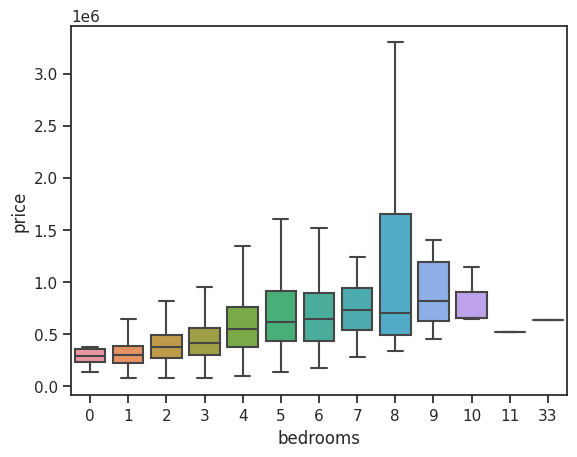

In [31]:
sns.set_theme(style="ticks")

sns.boxplot(x="bedrooms", y="price",
            data=df_kc_house, showfliers=False)

Text(0.5, 1.0, 'Prix moyen par rapport au nombre de chambre')

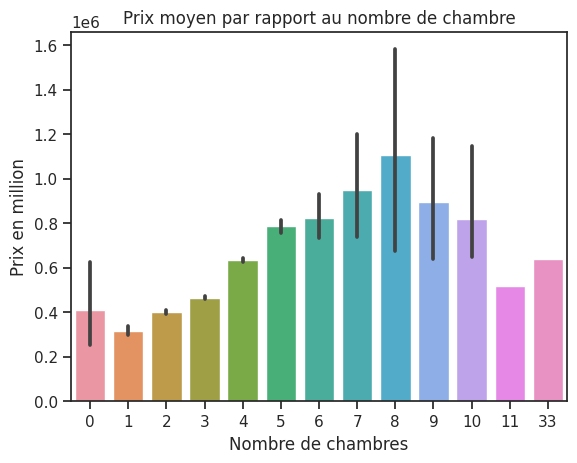

In [34]:
g = sns.barplot(data=df_kc_house, x="bedrooms", y="price")
g.set_xlabel("Nombre de chambres")
g.set_ylabel("Prix en million")
g.set_title("Prix moyen par rapport au nombre de chambre")


In [ ]:
##################################################################################################################################################
##################################################################################################################################################

In [ ]:
############### PRIX PAR RAPPORT AUX SALLES DE BAIN ##################

In [18]:
df_kc_house["bathrooms"].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [19]:
df_kc_house.groupby("bathrooms")["price"].describe()
# e+05 = 10 puissance 5(5 chiffres après la virgule) donc pour la moyenne de 1 salle de bain le resultat de 3.470412e+05 est 347041 dollars

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
0.00,10.0,4.481600e+05,4.153902e+05,75000.0,165250.0,317500.0,458000.0,1295650.0
0.50,4.0,2.373750e+05,8.888886e+04,109000.0,218500.0,264000.0,282875.0,312500.0
0.75,72.0,2.945209e+05,1.380845e+05,80000.0,201500.0,273500.0,355000.0,785000.0
1.00,3852.0,3.470412e+05,1.545595e+05,78000.0,230000.0,320000.0,425000.0,1300000.0
1.25,9.0,6.212167e+05,4.078361e+05,275000.0,360000.0,516500.0,545000.0,1388000.0
1.50,1446.0,4.093222e+05,1.937847e+05,107000.0,265962.5,370000.0,495600.0,1500000.0
1.75,3048.0,4.548961e+05,2.019625e+05,115000.0,310000.0,422900.0,555000.0,3278000.0
2.00,1930.0,4.578897e+05,2.060055e+05,115000.0,300500.0,423250.0,563000.0,2200000.0
2.25,2047.0,5.336768e+05,2.808988e+05,160000.0,339975.0,472500.0,625000.0,2400000.0


Text(0.5, 1.0, "Prix d'une maison en fonction du nombre de salles de bain")

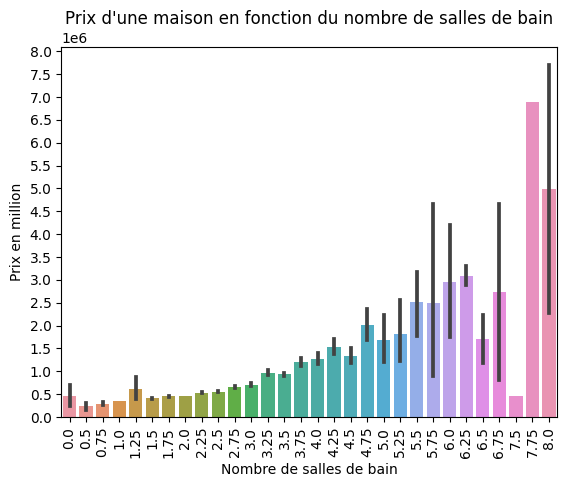

In [20]:
g = sns.barplot(data=df_kc_house,x="bathrooms", y="price")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_yticks(range(0, 8000001, 500000))
g.set_xlabel("Nombre de salles de bain")
g.set_ylabel("Prix en million")
g.set_title("Prix d'une maison en fonction du nombre de salles de bain")

In [ ]:
###################################################################################################################################################
###################################################################################################################################################

In [ ]:
############################## PRIX DU PIED CARRE PAR RAPPORT AU ZIPCODE #######################################################

[Text(0, 0, '98001'),
 Text(1, 0, '98002'),
 Text(2, 0, '98003'),
 Text(3, 0, '98004'),
 Text(4, 0, '98005'),
 Text(5, 0, '98006'),
 Text(6, 0, '98007'),
 Text(7, 0, '98008'),
 Text(8, 0, '98010'),
 Text(9, 0, '98011'),
 Text(10, 0, '98014'),
 Text(11, 0, '98019'),
 Text(12, 0, '98022'),
 Text(13, 0, '98023'),
 Text(14, 0, '98024'),
 Text(15, 0, '98027'),
 Text(16, 0, '98028'),
 Text(17, 0, '98029'),
 Text(18, 0, '98030'),
 Text(19, 0, '98031'),
 Text(20, 0, '98032'),
 Text(21, 0, '98033'),
 Text(22, 0, '98034'),
 Text(23, 0, '98038'),
 Text(24, 0, '98039'),
 Text(25, 0, '98040'),
 Text(26, 0, '98042'),
 Text(27, 0, '98045'),
 Text(28, 0, '98052'),
 Text(29, 0, '98053'),
 Text(30, 0, '98055'),
 Text(31, 0, '98056'),
 Text(32, 0, '98058'),
 Text(33, 0, '98059'),
 Text(34, 0, '98065'),
 Text(35, 0, '98070'),
 Text(36, 0, '98072'),
 Text(37, 0, '98074'),
 Text(38, 0, '98075'),
 Text(39, 0, '98077'),
 Text(40, 0, '98092'),
 Text(41, 0, '98102'),
 Text(42, 0, '98103'),
 Text(43, 0, '98105')

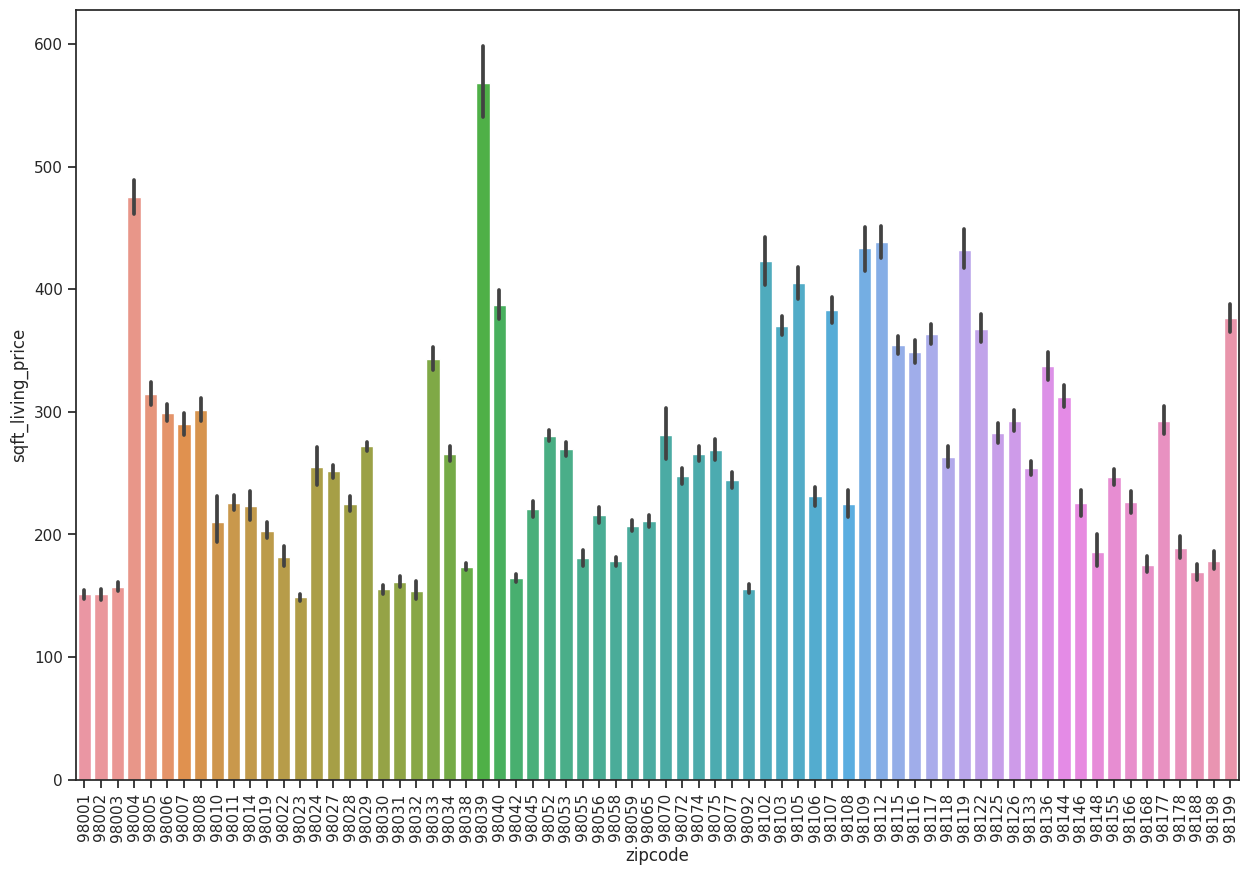

In [40]:
plt.figure(figsize=(15, 10))
g = sns.barplot(data=df_kc_house,x="zipcode", y="sqft_living_price")
g.set_xticklabels(g.get_xticklabels(), rotation=90)


In [10]:
import folium

m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)
for i, row in df_kc_house.iterrows():
    location = [row["lat"], row["long"]]
    marker = folium.Marker(location=location)
    marker.add_to(m)
m